In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import io

# Présentation du projet

Projet du cours d'Introduction au Machine Learning pour l'Image (IMLI)<br>
Promo : IMAGE 2024<br>
Enseignants : Guillaume Tochon & Joseph Chazalon

## Chargement et présentation des données

Les données qui sont mises à votre disposition pour ce projet sont celles du [_IEEE GRSS Data Fusion Contest 2013_](http://www.classic.grss-ieee.org/community/technical-committees/data-fusion/2013-ieee-grss-data-fusion-contest/). Le Data Fusion Contest de l'IEEE GRSS (Geoscience and Remote Sensing Society) est un challenge organisé chaque année par les membres du chapitre GRSS de l'association IEEE, qui est ouvert à tout chercheur, doctorant, étudiant, etc., et qui met en oeuvre des problématiques de fusion d'information (multi-capteurs, multi-dates, multi-sites, etc.) pour des applications en télédétection (imagerie satellitaire).

Les données du projet, présentées ci-dessous, ont été acquises au dessus de l'université de Houston en 2012, et se composent d'une image hyperpsectale de 144 bandes couvrant la portion $380-1050~$nm du spectre éléctromagnétique, et d'une image LiDAR. Les deux images sont à la même résolution spatiale de 2.5 m/pixel, et sont co-registrées (chaque pixel de l'une couvre exactement la même surface au sol que le pixel correspondant de l'autre image).

Les données sont stockées dans un format `.mat` (format Matlab). Le chargement se fait via `scipy.io.loadmat` qui retourne un dictionnaire.

In [2]:
data = sp.io.loadmat('data/2013_DFC_contest.mat')

### Image LIDAR ([plus d'infos ici](https://fr.wikipedia.org/wiki/Lidar))

Une image acquise par un capteur LiDAR fournit un modèle d'élévation de terrain (DSM, pour _digital surface model_). La scène est illuminée par un laser, et le capteur mesure le délai nécessaire à l'écho laser pour revenir depuis la cible. Connaissant la vitesse de déplacement du laser (vitesse de la lumière) et le temps nécessaire au laser pour faire l'aller/retour jusqu'à la scène, on peut en déduire facilement la distance. Lorsque le capteur LiDAR est embarqué sur un avion, la connaissance supplémentaire de l'altitude de vol de l'avion permet d'en déduire au final la hauteur du terrain (normalisée par rapport à une hauteur 0 fixée de manière arbitraire) : plus la valeur d'un pixel est élevée dans l'image LiDAR, plus la zone au sol correpondante est haute.

In [3]:
lidar = data['lidar']
print("L'image LiDAR est composée de %d lignes et %d colonnes "%(lidar.shape)+"au format %s"%lidar.dtype)

L'image LiDAR est composée de 349 lignes et 1905 colonnes au format float32


#### Visualisation du LiDAR

In [4]:
print("Valeur min = %1.3f et valeur max = %1.3f dans l'image LiDAR"%(lidar.min(),lidar.max()))

Valeur min = 4.420 et valeur max = 70.852 dans l'image LiDAR


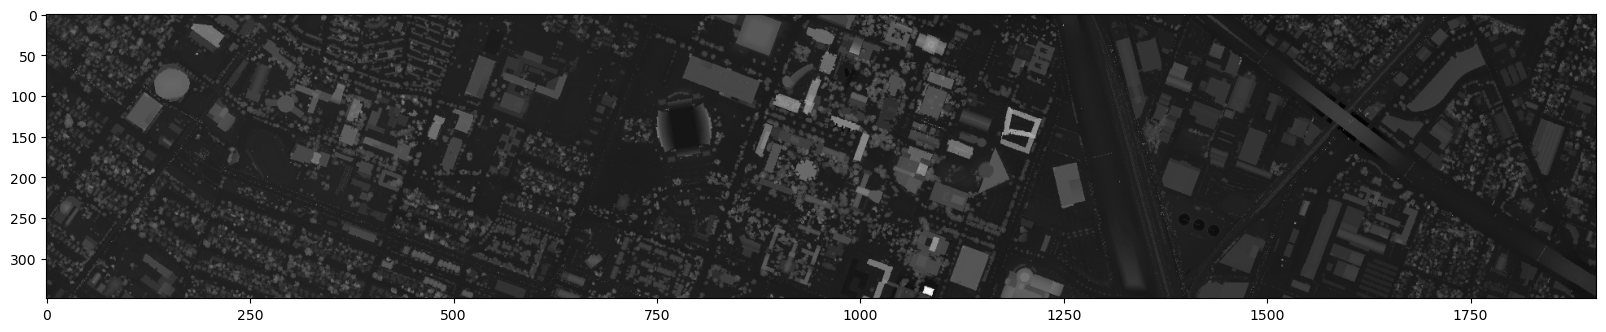

In [5]:
plt.figure(figsize=(20,5))
plt.imshow(lidar, cmap='gray')
plt.show()

### Image hyperspectrale ([plus d'infos ici](https://fr.wikipedia.org/wiki/Imagerie_hyperspectrale))

Les images hyperspectrales sont des "extensions" des images RGB traditionnelles dans le sens où elles n'ont plus 3 canaux, mais des centaines (voire des milliers). 
Un capteur hyperspectral échantillonne finement le spectre électromagnétique en collectant la quantité de lumière reçue dans de fines bandes de longueur d'onde (typiquement, une bande spectrale correspond a une largeur de quelques nanomètres). Au final, on obtient un cube de données avec $N$ canaux, et un pixel $\mathbf{x}$ n'est plus un triplet $\mathbf{x} = [x_R, x_G, x_B]$ comme pour une image RGB, mais un $N$-uplet $\mathbf{x} = [x_1,\dots,x_N] \in \mathbb{R}^N$ où chaque valeur $x_i$ correspond à la quantité de lumière qui a été reçue dans la $i$ème bande. Comme chaque bande est associée à une longueur d'onde particulière dans le spectre électromagnétique, tracer $\mathbf{x}$ en fonction de $i$ donne un _spectre de réflectance,_ en d'autres termes, comment la lumière qui atteint le capteur a interagi avec la matière dans la scène imagée. Comme deux matériaux différents (par exemple la végétation et le bitume) n'interagissent pas de la même manière avec la lumière, une image hyperspectrale permet d'identifier les composants macroscopiques (végétation, terre, métal, béton, eau, etc) présents dans la scène imagée. Les capteurs hyperspectraux sont largement utilisés dans le domaine de l'imagerie satellitaire (embarqués dans des avions et des satellites) à des fins d'observation de la Terre.

In [6]:
hsi_raw = data['hyper']
print("L'image hyperspectrale est composée de %d lignes, %d colonnes et %d bandes "%(hsi_raw.shape)
      +"au format %s"%hsi_raw.dtype)

L'image hyperspectrale est composée de 349 lignes, 1905 colonnes et 144 bandes au format uint16


#### Visualisation de l'image hyperspectrale

In [7]:
print("Valeur min = %d et valeur max = %d dans l'image hyperspectrale"%(hsi_raw.min(),hsi_raw.max()))

Valeur min = 0 et valeur max = 65517 dans l'image hyperspectrale


Une image hyperspectrale étant composée de centaines (voir milliers) de bandes, sa visualisation n'est pas directe : on ne peut pas demander à une routine de visualisation d'afficher telle quelle une image hyperspectrale. Il faut au préalable en extraire une version RGB, en sélectionnant 3 bandes spectrales (c'est-à-dire, 3 tranches du cube de données) dont les longueurs d'ondes correspondent à celles du rouge, du vert et du bleu.

Ici, l'intervalle de longueur d'ondes $380-1050~$nm est subdivisé en 144 bandes spectrales, et prenant comme longueurs d'ondes de référence 465 nm pour le bleu, 532 nm pour le vert et 630 nm pour le rouge, on peut calculer les bandes RGB suivantes : R = 54$^e$ bande, G = 32$^e$ bande et B = 18$^e$ bande.

In [8]:
rgb_bands = [54,32,18]
hsi_rgb = hsi_raw[:,:,rgb_bands]
hsi_rgb = hsi_rgb/hsi_rgb.max() # normalisation des valeurs dans [0,1] pour l'affichage

In [9]:
# Don't mind me, I'm just here to pimp a little bit the RGB image
pmin,pmax = np.percentile(hsi_rgb,(1,95),axis=(0,1))
hsi_rgb_pimped = hsi_rgb.copy()
for i in range(pmin.size):
    hsi_rgb_pimped[:,:,i] = (hsi_rgb[:,:,i]-pmin[i])/(pmax[i]-pmin[i])
hsi_rgb_pimped[hsi_rgb_pimped<0] = 0
hsi_rgb_pimped[hsi_rgb_pimped>1] = 1

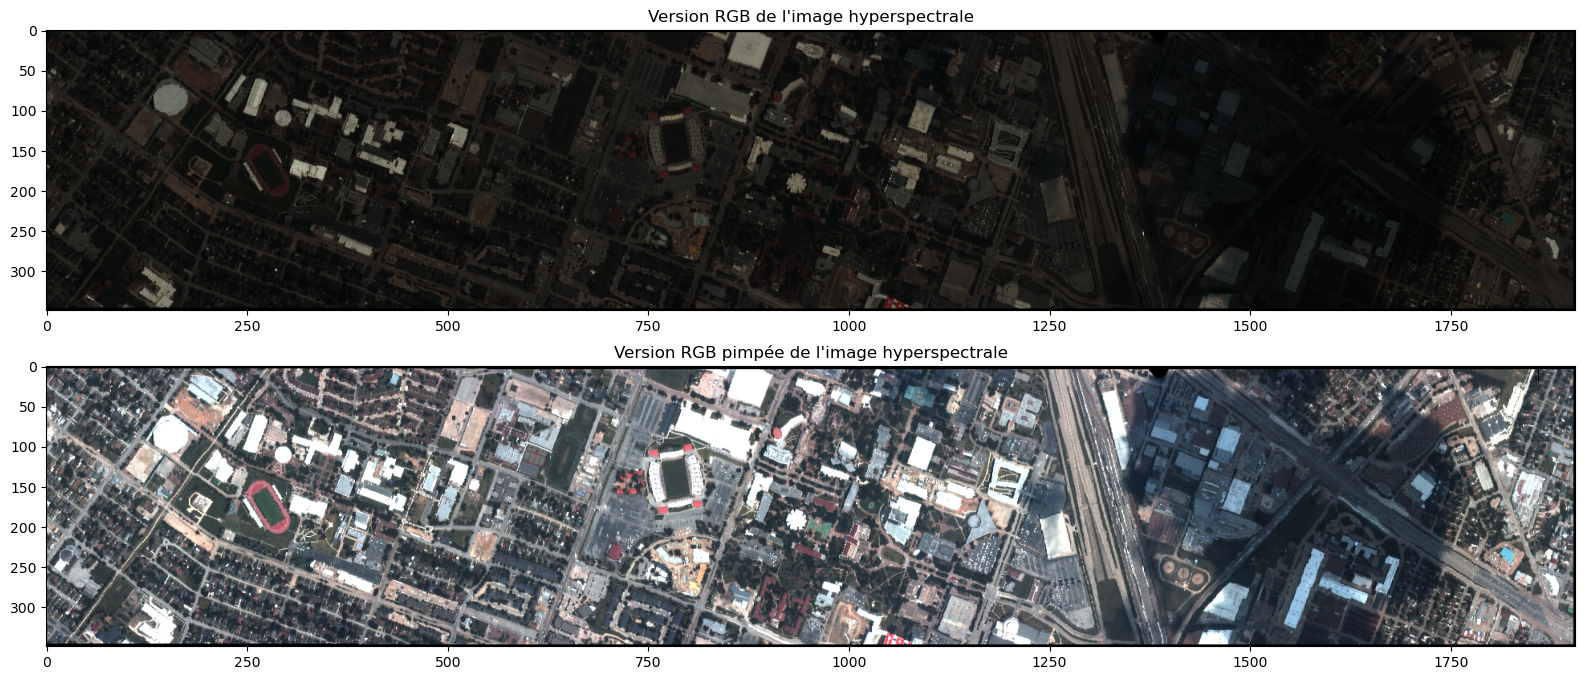

In [10]:
plt.figure(figsize=(20,8))
plt.subplot(211)
plt.title("Version RGB de l'image hyperspectrale")
plt.imshow(hsi_rgb)
plt.subplot(212)
plt.title("Version RGB pimpée de l'image hyperspectrale")
plt.imshow(hsi_rgb_pimped)
plt.show()

La scène est donc composée majoritairement de structures urbaines (maisons, bâtiments, routes, etc). On peut voir également des structures sportives (stade, piste de running, terrains de tennis). La partie droite de l'image est également assombrie par la présence d'un nuage (non discernable dans le LiDAR, qui est insensible aux artefacts d'illumations).

Pour facilier l'analyse visuelle de la scène, on peut la subdiviser en 3 sous-images correspondant à la partie gauche, à la partie centrale et à la partie droite de la scène. On peut remarquer en particulier une bande noire sur le pourtour de l'image hyperspectrale.

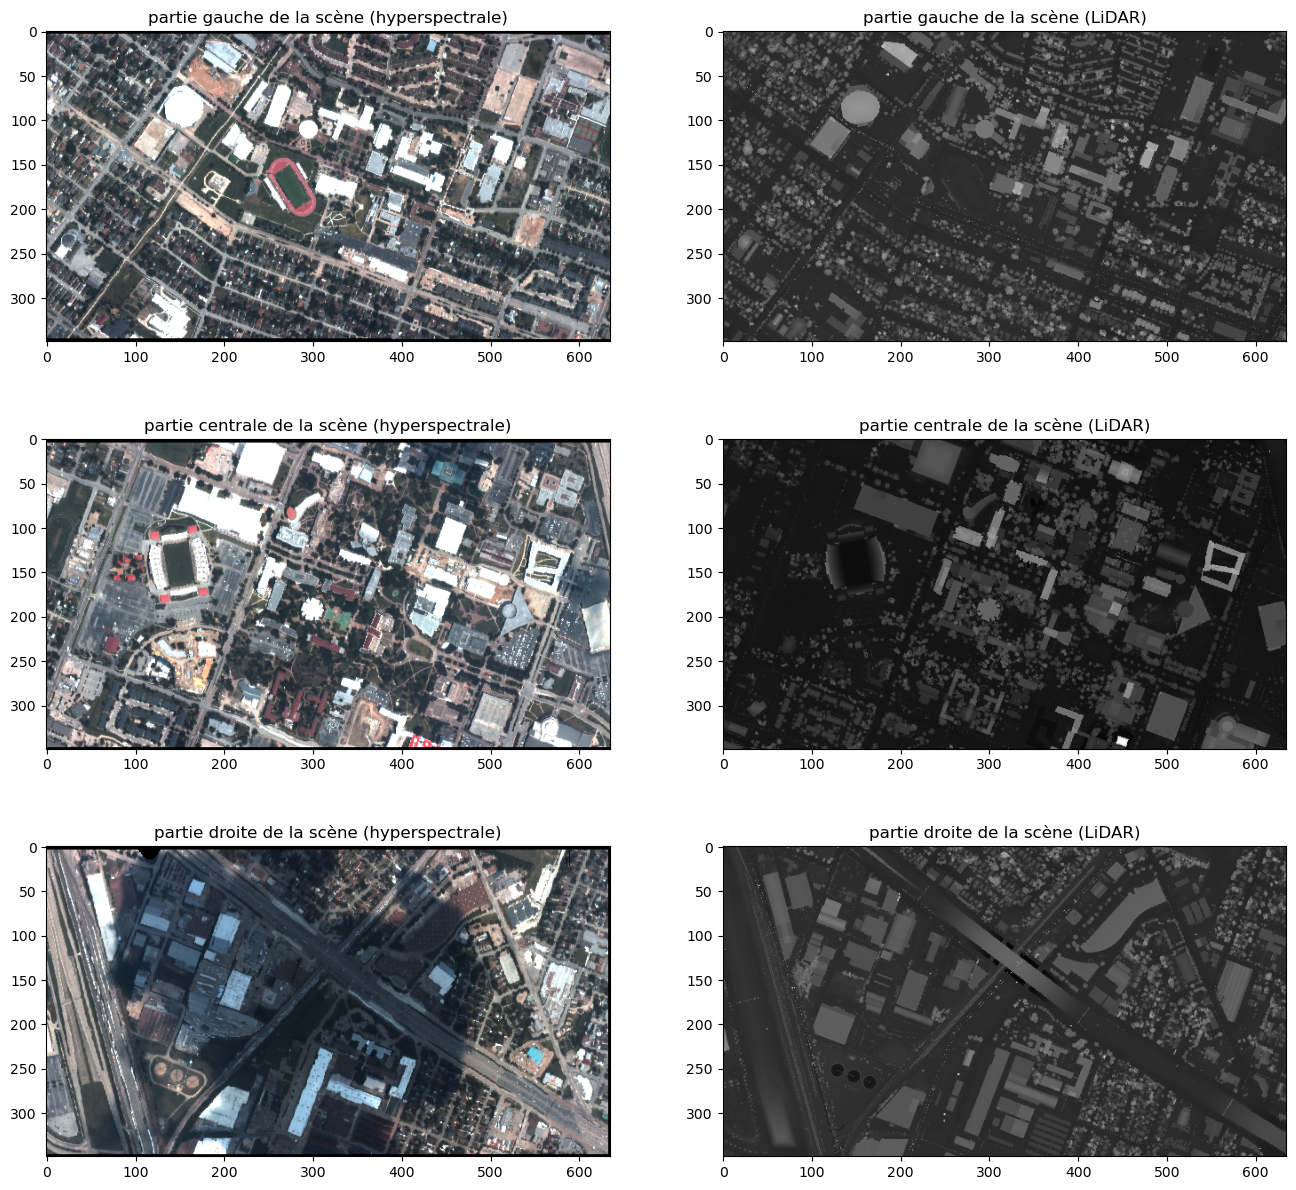

In [11]:
plt.figure(figsize=(16,15))
plt.subplot(321)
plt.title('partie gauche de la scène (hyperspectrale)')
plt.imshow(hsi_rgb_pimped[:,:635,:])
plt.subplot(322)
plt.title('partie gauche de la scène (LiDAR)')
plt.imshow(lidar[:,:635],cmap='gray')
plt.subplot(323)
plt.title('partie centrale de la scène (hyperspectrale)')
plt.imshow(hsi_rgb_pimped[:,635:1270,:])
plt.subplot(324)
plt.title('partie centrale de la scène (LiDAR)')
plt.imshow(lidar[:,635:1270],cmap='gray')
plt.subplot(325)
plt.title('partie droite de la scène (hyperspectrale)')
plt.imshow(hsi_rgb_pimped[:,1270:,:])
plt.subplot(326)
plt.title('partie droite de la scène (LiDAR)')
plt.imshow(lidar[:,1270:],cmap='gray')
plt.show()

## Chargement de la vérité terrain

Dans la scène présentée ci-dessus, 15 classes sémantiques ont été définies par les organisateurs du _Data Fusion Contest 2013_, et des zones au sol correspondant à ces différentes classes ont été identifées. Ces différentes zones de références constituent la vérité terrain, dont une partie vous est fournie dans le cadre du projet (la partie manquante, qui vous est cachée, servira de base de test pour la validation de votre solution).

In [12]:
groundtruth = np.load('groundtruth/groundtruth.npy')
groundtruth_info = np.load('groundtruth/groundtruth_info.npy',allow_pickle=True)
groundtruth_rgb = plt.imread('groundtruth/groundtruth.png')

La vérité terrain qui vous est fournie dans le cadre du projet est composée de trois fichiers : 
* `groundtruth_info` : un récapitulatif des différentes classes sémantiques (numérotées de 1 à 15) 

In [13]:
groundtruth_info

array([{'class_name': 'grass_healthy', 'class_label': 1, 'class_color': array([  0, 205,   0])},
       {'class_name': 'grass_stressed', 'class_label': 2, 'class_color': array([127, 255,   0])},
       {'class_name': 'grass_synthetic', 'class_label': 3, 'class_color': array([ 46, 205,  87])},
       {'class_name': 'tree', 'class_label': 4, 'class_color': array([  0, 139,   0])},
       {'class_name': 'soil', 'class_label': 5, 'class_color': array([160,  82,  45])},
       {'class_name': 'water', 'class_label': 6, 'class_color': array([  0, 255, 255])},
       {'class_name': 'residential', 'class_label': 7, 'class_color': array([255, 255, 255])},
       {'class_name': 'commercial', 'class_label': 8, 'class_color': array([216, 191, 216])},
       {'class_name': 'road', 'class_label': 9, 'class_color': array([255,   0,   0])},
       {'class_name': 'highway', 'class_label': 10, 'class_color': array([139,   0,   0])},
       {'class_name': 'railway', 'class_label': 11, 'class_color': array

Chaque classe est composée d'environ $190$ pixels (ce qui est peu...)

In [14]:
for ii in range(15):
    print("Classe %d : %s (%d pixels au total)"%(ii+1,groundtruth_info[ii]['class_name'],(groundtruth==ii+1).sum()))

Classe 1 : grass_healthy (198 pixels au total)
Classe 2 : grass_stressed (190 pixels au total)
Classe 3 : grass_synthetic (192 pixels au total)
Classe 4 : tree (188 pixels au total)
Classe 5 : soil (186 pixels au total)
Classe 6 : water (182 pixels au total)
Classe 7 : residential (196 pixels au total)
Classe 8 : commercial (191 pixels au total)
Classe 9 : road (193 pixels au total)
Classe 10 : highway (191 pixels au total)
Classe 11 : railway (181 pixels au total)
Classe 12 : parking_lot1 (192 pixels au total)
Classe 13 : parking_lot2 (184 pixels au total)
Classe 14 : tennis_court (181 pixels au total)
Classe 15 : running_track (187 pixels au total)


* `groundtruth` : la position spatiale dans la scène des différents pixels appartenant à ces 15 classes thématiques. Chaque pixel appartenant à la i$^e$ classe est donc de valeur $i$ dans cette carte de vérité terrain (par convention, tous les pixels dont la classe est inconnue sont de valeur $0$).

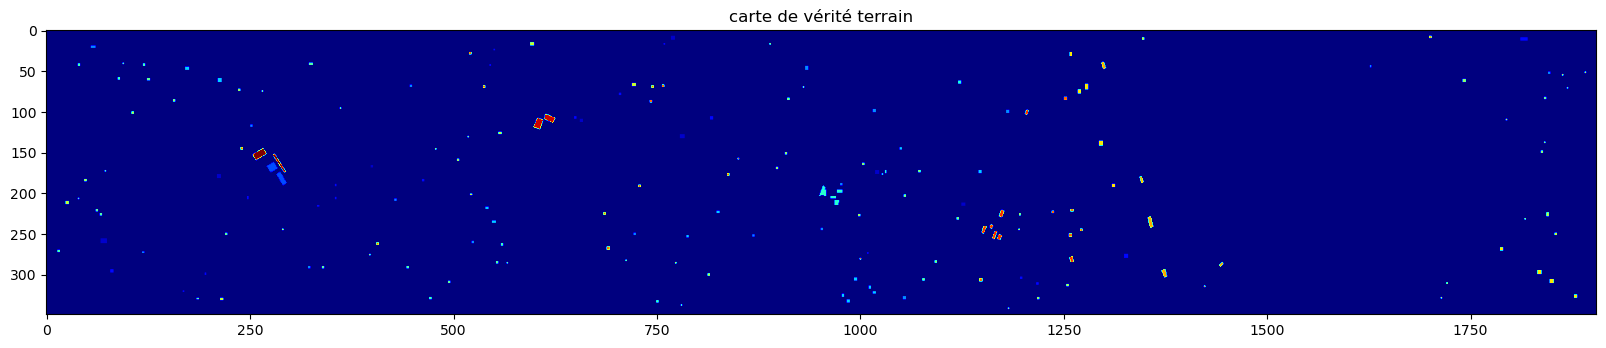

In [15]:
plt.figure(figsize=(20,5))
plt.title('carte de vérité terrain')
plt.imshow(groundtruth, cmap='jet')
plt.show()

* `groundtruth.png` : pour faciliter la visualisation des différentes classes composant la vérité terrain, on peut également attribuer à chaque classe une couleur (arbitraire), et représenter la vérité terrain comme une image RGB.

In [16]:
cls_rgb = []
for ii in groundtruth_info:
    cls_rgb.append(ii['class_color'])
cls_rgb = np.array(cls_rgb).reshape(15,-1,3)

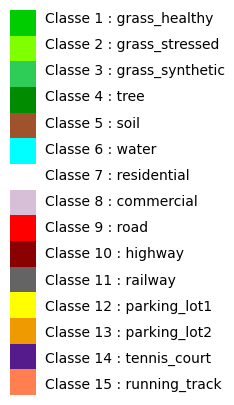

In [17]:
plt.figure(figsize=(5,5))
plt.imshow(cls_rgb)
plt.axis('off')
for cls in range(15):
        plt.text(0.85,1.02*cls,'Classe %d : %s'%(cls+1,groundtruth_info[cls]['class_name']))
plt.show()

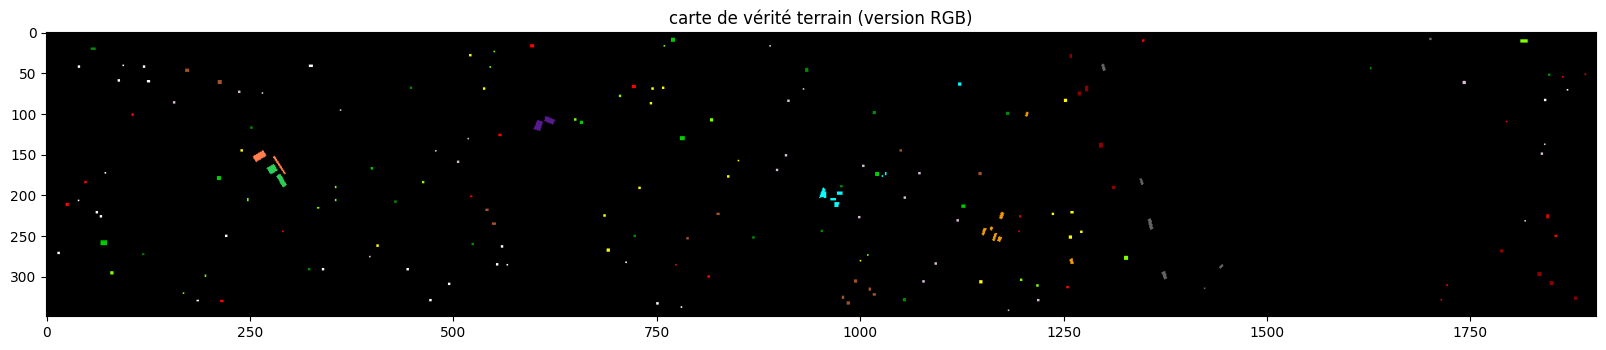

In [18]:
plt.figure(figsize=(20,5))
plt.title('carte de vérité terrain (version RGB)')
plt.imshow(groundtruth_rgb)
plt.show()

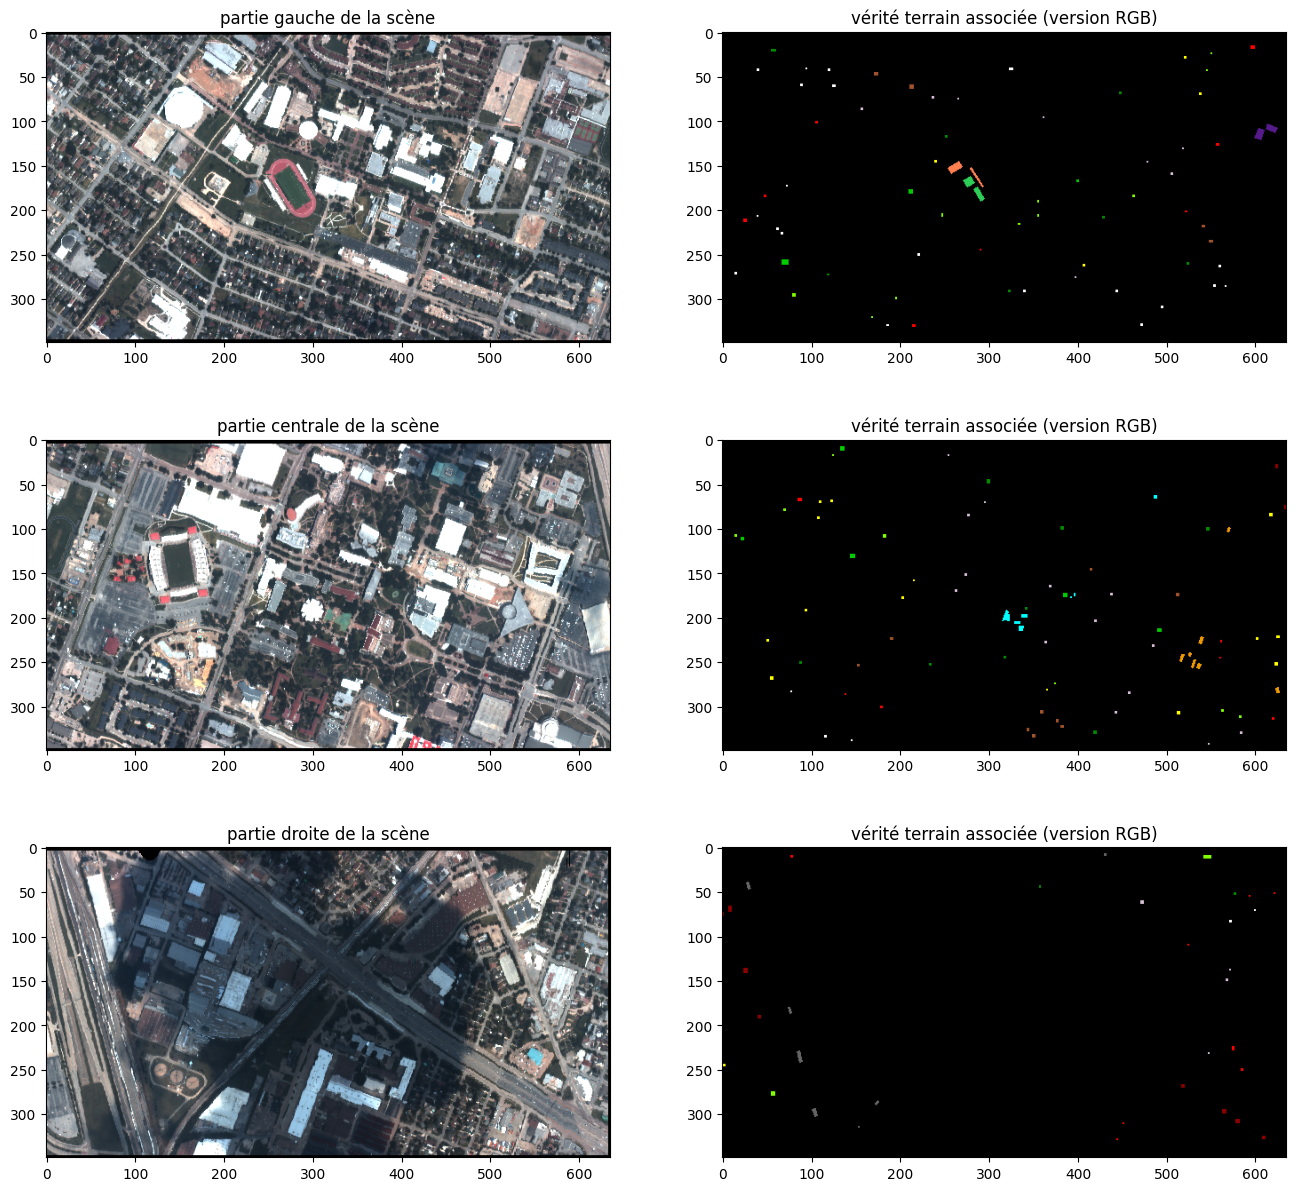

In [19]:
plt.figure(figsize=(16,15))
plt.subplot(321)
plt.title('partie gauche de la scène')
plt.imshow(hsi_rgb_pimped[:,:635,:])
plt.subplot(322)
plt.title('vérité terrain associée (version RGB)')
plt.imshow(groundtruth_rgb[:,:635,:],cmap='gray')
plt.subplot(323)
plt.title('partie centrale de la scène')
plt.imshow(hsi_rgb_pimped[:,635:1270,:])
plt.subplot(324)
plt.title('vérité terrain associée (version RGB)')
plt.imshow(groundtruth_rgb[:,635:1270,:],cmap='gray')
plt.subplot(325)
plt.title('partie droite de la scène')
plt.imshow(hsi_rgb_pimped[:,1270:,:])
plt.subplot(326)
plt.title('vérité terrain associée (version RGB)')
plt.imshow(groundtruth_rgb[:,1270:,:],cmap='gray')
plt.show()

## Objectif du projet

L'objectif du projet est d'effectuer **la classification sémantique des pixels de la scène**, c'est-à-dire assigner à chaque pixel l'identifiant (entre 1 et 15) de la classe à laquelle il appartient. Par exemple, tous les pixels de maison doivent être assignés à la classe $7$ (`residential`), tous les pixels de route doivent être assignés à la classe $9$ (`road`), etc.

Les images hyperspectrales (réflectance) et LiDAR (hauteur) portent une information complémentaire car de nature physique différente. Deux zones adjacentes dans la scène peuvent avoir des réponses spectrales très proches (par exemple, de la végétation et de l'herbe), mais des hauteurs différentes dans le LiDAR. À l'inverse, deux zones adjacentes peuvent avoir des hauteurs identiques dans l'image LiDAR (par exemple, de l'herbe et de la route) mais des réponses spectrales très différentes. Ainsi, votre solution devra, d'une manière ou d'une autre, fusionner l'information issue de l'image LiDAR avec celle de l'image hyperspectrale.

Votre solution devra prendre en entrée les deux images (hyperspectrale et LiDAR) et produire en sortie une carte de classification thématique, où chaque pixel a pour valeur le numéro de la classe à laquelle il appartient. Vous pouvez vous servir de toutes les ressources disponibles dans les bibliothèques `scikit-learn`, `scikit-image`, `numpy` et `scipy`, ainsi que de vos connaissances en traitement d'image (pour par exemple pré-traiter les données d'une manière ou d'une autre, ou post-traiter le résultat de classification).

Votre notebook devra :

- contenir votre code et toutes les explications qui nous permettront de comprendre et valider votre démarche
- exporter votre prédiction finale sur toute l'image au format `.npy` (voir ci-après) dans le même format que la vérité terrain
- préciser la contribution de chaque membre du groupe.

<u> pro tip </u> : une image hyperspectrale est nativement représentée comme un cube de données de dimensions $r \times c \times N$ où $r$ et $c$ correspondent au nombre de lignes et de colonnes dans l'image, et $N$ est le nombre de canaux, ce qui ne correspond pas au format attendu par la plupart des algorithmes de `scikit-image` ($N_{samples} \times N_{features}$, où $N_{samples}$ est le nombre d'échantillons et $N_{features}$ est le nombre de caractéristiques (la dimensionalité) de chaque échantillon). 
<br> Pour transformer une image hyperspectrale au format standard de `scikit-image`, on pourra simplement utiliser `hsi.reshape(rc,N)`

## Export des résultats

Nous vous fournissons ici le code pour exporter vos résultats au bon format.

Il vous suffit de remplacer la définition de la variable `predictions` dans la cellule ci-dessous pour lui affecter la valeur de vos prédictions effectives, et le reste devrait fonctionner automatiquement si vous n'avez pas fait d'erreur.

In [21]:
## Export des résultats
predictions = groundtruth.copy() ## FIXME changer cette ligne !
predictions.shape, predictions.dtype

((349, 1905), dtype('int64'))

In [28]:
# Sanity check 1: do predictions have the correct shape?
assert(predictions.shape == groundtruth.shape)

In [29]:
# Sanity check 2: are predicted values in the correct domain?
assert(np.all(np.in1d(predictions.flatten(), np.unique(groundtruth))))

In [42]:
# Export
import os.path
filename_predictions = "predictions.npz"
np.savez_compressed(filename_predictions, data=predictions)
assert(os.path.exists(filename_predictions))

In [43]:
# Sanity check 3: read file again and check its content is consistent
loaded_data = np.load(filename_predictions)['data']
assert(np.allclose(loaded_data, predictions))

In [44]:
print(f"Export terminé ! N'envoyer QUE votre notebook et le fichier `{filename_predictions}` sur Moodle !")

Export terminé ! N'envoyer QUE votre notebook et le fichier `predictions.npz` sur Moodle !


# À vous de jouer !